<center><h1>Embedded Simulation with Cadmium v2</h1></center>

<br></br>

<center><h2>Ezequiel Pecker-Marcosig</h2></center>
<center><h4><font color=blue>emarcosig@dc.uba.ar</font></h4></center>

<br></br>
<center><h3><font color=gray>Discrete-Event Simulations Lab (SEDLab)</font></h3></center>
<center><h3><font color=gray>Computing Department (DC), Research Institute of Computer Science (ICC)</font></h3></center>
<center><h3><font color=gray>School of Exact and Natural Sciences (FCEyN), University of Buenos Aires (UBA)</font></h3></center>

<center><h3><font color=gray>Argentina</font></h3></center>


# Table of Contents

* [Introduction](#intro)
* [Cadmium v2](#cadmium-v2)
* [Mbed-OS](#mbed-os)
* [Example 1: Blinky LED](#example-blinky-led)
* [Example 2: Seven Segments](#example-seven-segments)

<a id='intro'></a>
# Introduction

Today I’m going to talk about:
1. How to work with the Cadmium v2 simulator to run embedded simulations through one example (or two if time permits).
2. How to reduce the memory footprint for the executable to allow us to use cheaper hardware to run embedded simulations.
3. How to enable simulation logging when running embedded and print messages through the serial port.

<a id='cadmium-v2'></a>
# Cadmium v2

Cadmium v2 [[1]](https://www.sciencedirect.com/science/article/pii/S1569190X22001198) is a brand new version of the Cadmium simulator toolkit [[2]](https://ieeexplore.ieee.org/document/9004917) that is more flexible and implemented as a header-only C++ library. This new version of Cadmium is publicly available on GitHub [[3]](https://github.com/SimulationEverywhere/cadmium_v2).

The documentation for Cadmium v2 can be found in this [wiki](https://github.com/SimulationEverywhere/cadmium_v2/wiki).

To perform embedded simulations we are going to use the branch [rt-dev](https://github.com/SimulationEverywhere/cadmium_v2/tree/dev-rt) in the Cadmium v2 repo that was developed by Jon, Román and Guille.

This code for Cadmium v2 runs on top of the [Mbed-OS](https://os.mbed.com/mbed-os/) real-time operating system at the user-application level.

### References
* [1] Belloli, L., Vicino, D., Ruiz-Martin, C., & Wainer, G. (2019, December). Building devs models with the cadmium tool. In 2019 Winter Simulation Conference (WSC) (pp. 45-59). IEEE.
* [2] Cárdenas, R., & Wainer, G. (2022). Asymmetric Cell-DEVS models with the Cadmium simulator. Simulation Modelling Practice and Theory, 121, 102649.
* [3] Cárdenas, R., Trabes, G., 2022. Cadmium 2: an object-oriented C++ M&S platform for the PDEVS formalism. [Online; Accessed on: November, 24, 2022] Available at https://github.com/SimulationEverywhere/cadmium_v2.

## Setting up the environment

I made a copy of the original [repo](https://github.com/SimulationEverywhere/cadmium_v2) for Cadmium v2 that can be found [repo](https://github.com/epecker/cadmium_v2). To clone this repo run:

```
$ git clone https://github.com/epecker/cadmium_v2.git
```

Following, we are going to download the simulator from this [repository](https://github.com/epecker/cadmium_v2.git). For this duty we have to load the Python library `pathlib` first.

In [132]:
from pathlib import Path

Then we are going to define some Bash environmental variables that will be used along this notebook:

In [133]:
CADMIUMV2_HOME = Path.home().joinpath('SED/demo-cadmiumv2')
CADMIUMV2_DIR = CADMIUMV2_HOME.joinpath('cadmium_v2')

CADMIUMV2_SRC = CADMIUMV2_DIR.joinpath('include/cadmium/core')
CADMIUMV2_BLINKY_EXAMPLE = CADMIUMV2_HOME.joinpath('Blinky')
CADMIUMV2_COUNTER7SEG_EXAMPLE = CADMIUMV2_HOME.joinpath('Counter7seg')

# URL for the repo
CADMIUMV2_TEST_REPO = 'https://github.com/epecker/cadmium_v2.git'
BLINKY_EXAMPLE_REPO = 'https://github.com/epecker/Blinky.git'

Finally, let's clone the repo `CADMIUMV2_TEST_REPO` in folder `CADMIUMV2_HOME` (uncomment and run the following cell):

In [ ]:
%%bash -s "$CADMIUMV2_HOME" "$CADMIUMV2_TEST_REPO"

# $1 is the folder we are going to clone cadmium v2 (CADMIUMV2_HOME)
# $2 is the URL for the repo (CADMIUMV2_TEST_REPO)

# check if the folder exists and if it exists the does nothing, otherwise it creates the folder
[ -d $1 ] || mkdir -p $1
cd $1

# check if the folder exists and if it exists the does nothing, otherwise it clones the repo with git clone
# [ -d cadmium_v2 ] || git clone $2 

echo "Finished!"

Then clone the repo for the Example 1:

In [ ]:
%%bash -s "$CADMIUMV2_HOME" "$BLINKY_EXAMPLE_REPO"

# check if the folder exists and if it exists the does nothing, otherwise it clones the repo with git clone
# [ -d Blinky ] || git clone $2 

echo "Finished!"

If everythng went OK, under the folder `demo-cadmiumv2` we should see:

In [4]:
%%bash -s "$CADMIUMV2_HOME"

cd $1

ls

Blinky
boost_1_70_0
cadmium_v2
cadmiumv2-blinky.jpg
cadmiumv2_logging_howto.ipynb
cadmium_v2_logs
cadmium_v2_shrinked
Counter7seg
mbed_os_howto.ipynb
TempComp
_TempComp


<a id='mbed-os'></a>
# Mbed-OS 

[Mbed-OS](https://os.mbed.com/docs/mbed-os/v6.15/introduction/index.html) is an open-source real-time operating system with support for a wide range of ARM Cortex-M based devices.

It provides an abstraction layer for the microcontrollers it runs on, so a developer does not need to worry about the hardware and can write C/C++ applications that run on any Mbed-enabled board.

Mbed-OS can be donwloaded from this [github repo](https://github.com/ARMmbed/mbed-os).

## Architecture

Here we can see the basic [architecture](https://os.mbed.com/docs/mbed-os/v6.15/introduction/architecture.html) of an Mbed board running Mbed OS.

The **user application** for us will be the cadmium simulator and the model running inside.

The **Hardware Abstraction Layer** (HAL) abstracts away the hardware intricacies and provides APIs to interact with it.



<center>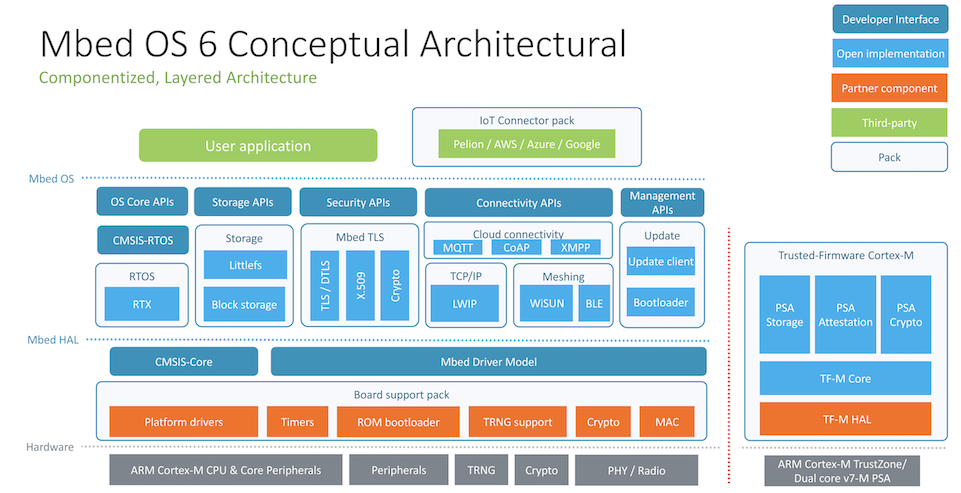</center>

## Tools

Mbed provides [three alternatives](https://os.mbed.com/docs/mbed-os/v6.15/build-tools/index.html) to build an application with Mbed-OS:

* Mbed Studio: Desktop IDE that includes the Arm Compiler 6 (for buildig) and pyOCD (for debugging). 
* Mbed CLI: **C**ommand **L**ine **I**nterface for Mbed that can make use of different building toolchains and debugging. This is a Python-based building tool for Mbed-OS.
  * **CLI1**
  * CLI2
* Mbed Online Compiler: web-browser based editor to write and build applications.

### Mbed CLI

For Mbed CLI we can choose to build Mbed OS with:

| Compiler | Name in CLI|
| ---------- | ------------ |
| ARM Compiler | ARM |
| GNU ARM Embedded toolchains | GCC_ARM |

In what follows we are going to use **Mbed CLI 1** with the GNU ARM toolchain

### Install the ARM GNU Toolchain (GCC ARM Compiler)

The [GNU ARM Embedded Toolchain](https://developer.arm.com/downloads/-/gnu-rm) is a ready-to-use, open-source suite of tools for C, C++ and assembly programming provided by ARM. It includes the GNU Compiler (GCC).

This toolchaing targets the 32-bit Arm Cortex-A, Arm Cortex-M, and Arm Cortex-R processor families. 

Go to this link and download the corresponding version for your OS. I'm using `gcc-arm-none-eabi-10.3-2021.10`for Linux:

```
$ wget https://developer.arm.com/-/media/Files/downloads/gnu-rm/10.3-2021.10/gcc-arm-none-eabi-10.3-2021.10-x86_64-linux.tar.bz2?rev=78196d3461ba4c9089a67b5f33edf82a&hash=D484B37FF37D6FC3597EBE2877FB666A41D5253B
```

Then extract GCC ARM:

```
$ tar jxf gcc-arm-none-eabi-10.3-2021.10-x86_64-linux.tar.bz2
```

Then move the GCC ARM Compiler to `/opt/`
```
sudo mv gcc-arm-none-eabi-10.3-2021.10 /opt/
```

### Installation and setup of Mbed CLI 1

The steps for instaling Mbed CLI 1 can be ckecked [here](https://os.mbed.com/docs/mbed-os/v6.15/build-tools/install-and-set-up.html). To install all dependencies on Ubuntu run the following command:

```
$ sudo apt install python3 python3-pip git
```

Then, to install the `mbed-cli` for Mbed CLI 1:
```
$ python3 -m pip install mbed-cli
```

Then, to configure Mbed CLI 1 we use the `mbed config`. To have a list of all the parameters run:

In [134]:
%%bash
mbed config --help

usage: mbed config [-h] [-G] [-U] [-L] [-v] [-vv] [var] [value]

Gets, sets or unsets mbed tool configuration options.
Options can be global (via the --global switch) or local (per program)
Global options are always overridden by local/program options.
Currently supported options: target, toolchain, protocol, depth, cache, profile, color

positional arguments:
  var                  Variable name. E.g. "target", "toolchain", "protocol"
  value                Value. Will show the currently set default value for a
                       variable if not specified.

optional arguments:
  -h, --help           show this help message and exit
  -G, --global         Use global settings, not local
  -U, --unset          Unset the specified variable.
  -L, --list           List mbed tool configuration. Not to be confused with
                       compile configuration, e.g. "mbed compile --config".
  -v, --verbose        Verbose diagnostic output
  -vv, --very_verbose  Very verbose diagnostic 

Then, we use this command to setup the compiler location. Given that we are using the GCC ARM Embedded Compiler, we have to set the GCC_ARM_PATH:

```
$ mbed config -G GCC_ARM_PATH /opt/gcc-arm-none-eabi-10.3-2021.10/bin
```

We can take a look at all the tools for building and debugging provided by this toolchain:

In [135]:
%%bash
ls /opt/gcc-arm-none-eabi-10.3-2021.10/bin/

arm-none-eabi-addr2line
arm-none-eabi-ar
arm-none-eabi-as
arm-none-eabi-c++
arm-none-eabi-c++filt
arm-none-eabi-cpp
arm-none-eabi-elfedit
arm-none-eabi-g++
arm-none-eabi-gcc
arm-none-eabi-gcc-10.3.1
arm-none-eabi-gcc-ar
arm-none-eabi-gcc-nm
arm-none-eabi-gcc-ranlib
arm-none-eabi-gcov
arm-none-eabi-gcov-dump
arm-none-eabi-gcov-tool
arm-none-eabi-gdb
arm-none-eabi-gdb-add-index
arm-none-eabi-gdb-add-index-py
arm-none-eabi-gdb-py
arm-none-eabi-gprof
arm-none-eabi-ld
arm-none-eabi-ld.bfd
arm-none-eabi-lto-dump
arm-none-eabi-nm
arm-none-eabi-objcopy
arm-none-eabi-objdump
arm-none-eabi-ranlib
arm-none-eabi-readelf
arm-none-eabi-size
arm-none-eabi-strings
arm-none-eabi-strip


Among them we can see:

* `arm-none-eabi-g++`: C++ compiler
* `arm-none-eabi-ld`: Linker
* `arm-none-eabi-size`: Tool to measure the size of our code
* `arm-none-eabi-nm`: Tool to list symbols from object files
* `arm-none-eabi-objdump`: Tool to display information from object files

## Building with Mbed CLI 1

For [building](https://os.mbed.com/docs/mbed-os/v6.15/build-tools/compile.html) our application we use `mbed compile`. To have a list of all the parameters run:

In [131]:
%%bash
mbed compile -h

usage: mbed compile [-h] [-t TOOLCHAIN] [-m TARGET] [-D MACRO]
                    [--profile PROFILE] [--library] [--config]
                    [--prefix CONFIG_PREFIX] [--source SOURCE] [--build BUILD]
                    [-c] [-f] [--sterm] [--baudrate BAUDRATE]
                    [-N ARTIFACT_NAME] [-S [{matrix,toolchains,targets}]]
                    [--app-config APP_CONFIG] [-v] [-vv]

Compile this program using the mbed build tools.

optional arguments:
  -h, --help            show this help message and exit
  -t TOOLCHAIN, --toolchain TOOLCHAIN
                        Compile toolchain. Example: ARM, GCC_ARM, IAR
  -m TARGET, --target TARGET
                        Compile target MCU. Example: K64F, NUCLEO_F401RE,
                        NRF51822...
  -D MACRO, --macro MACRO
                        Add a macro definition
  --profile PROFILE     Path of a build profile configuration file (or name of
                        Mbed OS profile). Default: develop
  --library      

We see that for building an application with Mbed CLI 1 we use the following command:
```bash
$ mbed compile -m <TARGET> -t <TOOLCHAIN> --profile <PROFILE> --flash.
```
where the toolchaing corresponds to `ARM GCC`.

The resulting files after building can be found under: `BUILD/<TARGET>/\<TOOLCHAIN>-<PROFILE>/`. They are:

* `<PROJECT_NAME>.bin`: the executable file that has to be deployed on the board.
* `<PROJECT_NAME>.elf`: 
* `<PROJECT_NAME>.map`: the map file used by the linker.

The resulting `bin` file will then be `<PROJECT_NAME>.bin` and it is deployed in the hardware by copying it to the USB device created when plugging the board to the PC.

It is worth mentioning that the size of the `bin` file reported after running `mbed compile` is slightly shorter than the one obtained with the command `du -h <file.bin>` as we will see.

**Note 1** The command `mbed compile` compiles every source code (e.g. cpp file) in the same folder (not including subfolders) as it is pointed out [here](https://os.mbed.com/docs/mbed-os/v6.15/program-setup/build-rules.html). To avoid this use an `.mbedignore` file.


## Build profiles

The [build profiles](https://os.mbed.com/docs/mbed-os/v6.15/program-setup/build-profiles-and-rules.html) defines the set of **flags** that is passed to the underlying compilers (i.e. `arm-none-eabi-gcc` and `arm-none-eabi-g++`).

The **build profiles** are JSON files with the root object containing key-value pairs for each supported toolchain, such as `GCC_ARM`. They are passed to `mbed compile` with the `--profile` option.

**Note 1** You can specify more than one build profile calling multiple times to `--profile`.

#### Built-in build profiles

There are 3 pre-defined [profiles](https://os.mbed.com/docs/mbed-os/v6.15/program-setup/build-profiles-and-rules.html#release):

* `Develop`: (`--profile develop`) this profile provides small and fast code.
* `Debug`: (`--profile debug`) this profile provides the largest and slowest performance.
* `Release`: (`--profile release`) this features the smallest code size and still fast. 

#### User-defined build profiles

A user can also create their own custom build profile using a JSON file (subject to the JSON build profile format) for specifying:

* `c`: Flags for the C Compiler
* `cxx`: Flags for the C++ Compiler
* `common`: Flags for _both_ the C and C++ Compilers
* `ld`: Flags for the Linker

Some common options for the c and c++ compilers (`arm-none-eabi-gcc` and `arm-none-eabi-g++`) are: `-Wall`(for enabling all warning flags during complation), `-Wextra` (for enabling extra warning flags), "-Os" (for optimizing for size), etc. Moreover, if there are user-defined options, such as `RT_ARM_MBED` and `NO_LOGGING`, they are passed with a `-D` right before it.

Let's see how this file looks like for the Blinky example that we will se shortly:

In [128]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1
cat cadmium2.json

{
    "GCC_ARM": {
        "common": ["-c", "-Wno-all", "-Wextra",
                   "-Wno-unused-parameter", "-Wno-missing-field-initializers",
                   "-fmessage-length=0", "-fno-exceptions", "-fno-builtin",
                   "-ffunction-sections", "-fdata-sections", "-funsigned-char",
                   "-MMD", "-fno-delete-null-pointer-checks",
                   "-fomit-frame-pointer", "-Os", "-g1", "-DMBED_TRAP_ERRORS_ENABLED=1",
		   "-Wno-register", "-DBOOST_NO_PLATFORM_CONFIG", "-DRT_ARM_MBED", "-fexceptions","-DNO_LOGGING"],
        "asm": ["-x", "assembler-with-cpp"],
        "c": ["-std=gnu99"],
        "cxx": ["-std=gnu++17", "-Wvla", "-I", "../../cadmium_v2/include", "-I", "../../boost_1_70_0", "-I", "../mbed-os", "-I", "../data_structures"],
        "ld": ["-Wl,--gc-sections", "-Wl,--wrap,main", "-Wl,--wrap,_malloc_r",
               "-Wl,--wrap,_free_r", "-Wl,--wrap,_realloc_r", "-Wl,--wrap,_memalign_r",
               "-Wl,--wrap,_calloc_r", "-Wl,--wrap,ex

## Configuration system for Mbed-OS

The [Configuration system](https://os.mbed.com/docs/mbed-os/v6.15/program-setup/advanced-configuration.html) for Mbed OS allows to customize compile-time configuration parameters. For instance, the baudrate used for the serial-USB debug interface.

A user can modify this configuration parameters by means of the file `mbed_app.json`. This file is specified using a JSON file.

Let's take a look at this file for the aformentioned example:

In [9]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1
cat mbed_app.json

{
    "macros": [
        "NDEBUG=1"
    ],
    "target_overrides": {
        "*": {
            "target.printf_lib": "minimal-printf",
            "platform.memory-tracing-enabled": "true",
            "platform.stdio-baud-rate": 9600
        },
        "K64F": {
            "platform.stdio-baud-rate": 9600
        }
    }
}


For instance, for the function `printf()` a user can choose to use the standard implementation `"target.printf_lib": "std"` (which requires more flash memory) or `"target.printf_lib": "minimal-printf"` for a reduced version. 

If the specified target is `"*"` then it applies to all the boards.

With the option `NDEBUG` we ca get a reduction on memory usage ([link](https://os.mbed.com/blog/entry/Optimizing-memory-usage-in-mbed-OS-52/)).

A full list of th configuration parameters can be seen [here](https://os.mbed.com/docs/mbed-os/v5.15/reference/configuration-platform.html)

<a id='example-blinky-led'></a>
# Example 1: Blinky LED

This is the "Hello World!" exaple but for embedded systems.

## Model desciption

<font color=red>ADD EXPLANATION</font>

## Model and simulator

<center>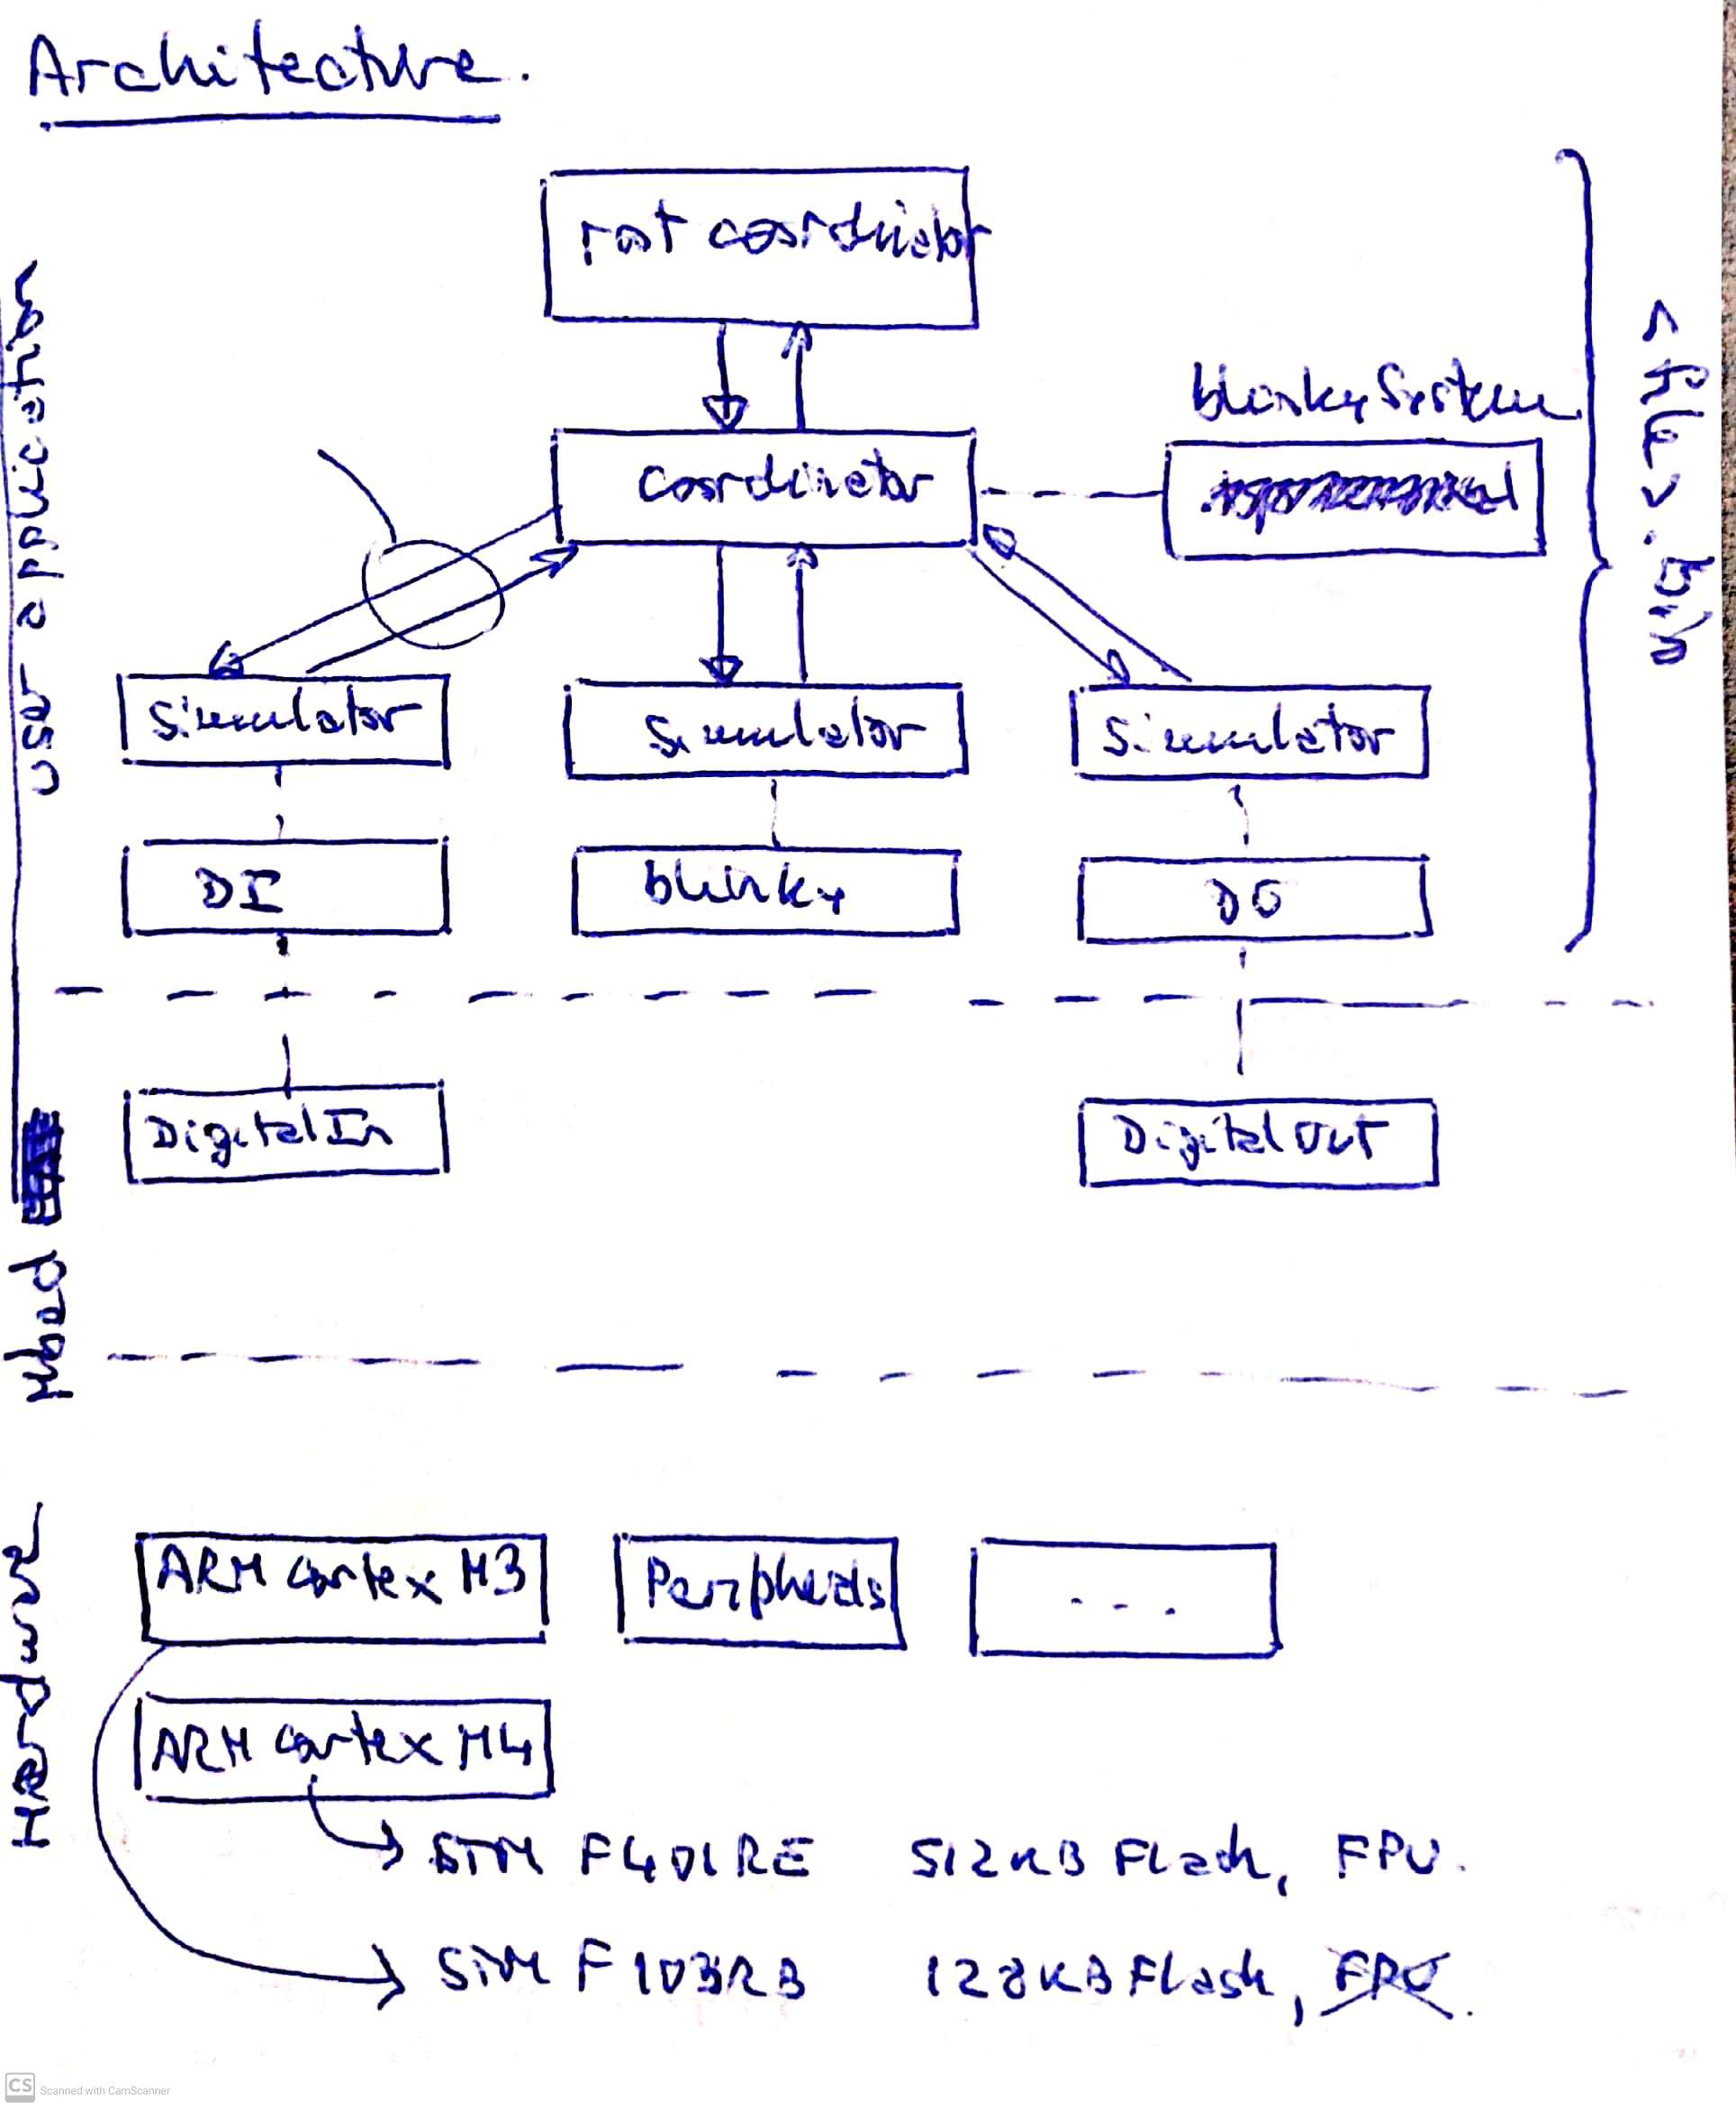</center>

<font color=red>EDIT IMAGE</font>


Let's take a look to the files that compose this application under the `Blinky` folder:

In [5]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"

cd $1
ls

BUILD
cadmium2.json
cadmium.json
cadmium.json.orig
cadmium_logging_on.json
drivers
install.sh
mbed_app.json
mbed-os
mbed-os.lib
mbed_settings.py
mbed_settings.pyc
__pycache__
README.md
top_model


The model is under the folder `top_model/`. This folder contains: 

In [6]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"

cd $1/top_model
ls -R

.:
include
main_rt_model.cpp
makefile

./include:
blinky.hpp
blinkySystem.hpp


## Main file

The `main_rt_model.cpp` file is where they are created an instance of the **top model** and and instance of the **root coordinator**. This last takes the top model, the simulation time and the logger (if any) and starts the simulation.

Let's see how to specify the _main_ file:

In [7]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"

cd $1/top_model
cat main_rt_model.cpp

#ifndef NO_LOGGING
	#include <cadmium/core/logger/rt.hpp>
#endif
#include <cadmium/core/simulation/root_coordinator.hpp>
#include <limits>
#include "blinkySystem.hpp"
#include "../mbed.h"

using namespace cadmium::blinkySystem;

int main(int argc, char *argv[]) {
	// First, we parse the arguments
	// std::ifstream file;

	auto model = std::make_shared<blinkySystem>("blinkySystem");
	auto rootCoordinator = cadmium::RootCoordinator(model);
#ifndef NO_LOGGING
	printf("[simulation] welcome to rt-cadmium v2!\n"); // printing to serial port
	auto logger = std::make_shared<cadmium::RTLogger>(";");
	rootCoordinator.setLogger(logger);
#endif
	rootCoordinator.start();
	rootCoordinator.simulate(std::numeric_limits<double>::infinity());
	rootCoordinator.stop();
	return 0;
}
// to make this model in RT use
// mbed compile --target NUCLEO_F401RE --toolchain GCC_ARM --profile ../cadmium.json --flash


## Top model

The definition of the **coupled top model** for this model is in `blinkySystem.hpp`. This coupled model has no input nor output ports.

This **coupled model** comprises three **atomic models**:
1. DigitalOutput
2. DigitalInput
3. Blinky

When instancing an object for an atomic we could specify the parameters, for instance the I/O ports in the board for the Digital Input and Digital Output atomic models:
* DigitalInput: pin PC_13
* DigitalOutput: pin LED1

In this [webpage](https://os.mbed.com/platforms/ST-Nucleo-F401RE/) you can find the pinout for the NUCLEO F401RE board. 

Let's see how it looks like:

In [8]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"

cd $1/top_model/include/
cat blinkySystem.hpp

#ifndef CADMIUM_EXAMPLE_BLINKY_HPP_
#define CADMIUM_EXAMPLE_BLINKY_HPP_

#include <cadmium/core/modeling/coupled.hpp>
#include <cadmium/core/real_time/arm_mbed/io/digitalOutput.hpp>
#include <cadmium/core/real_time/arm_mbed/io/digitalInput.hpp>
// #include <cadmium/core/real_time/arm_mbed/io/interruptInput.hpp>
#include "blinky.hpp"
#include "../mbed.h"
#include "PinNames.h"

namespace cadmium::blinkySystem {
	//! Coupled DEVS model to show how the IEStream atomic model works.
	struct blinkySystem : public Coupled {

		/**
		 * Constructor function for the iestream model.
		 * @param id ID of the iestream model.
		 * @param filePath path to the input file to be read.
		 */
		blinkySystem(const std::string& id) : Coupled(id) {
		
			// NUCLEO F103RB	
			auto digitalOutput = addComponent<DigitalOutput>("digitalOuput", LED1); // PC_13); // LED1); // D3);
			auto digitalInput  = addComponent<DigitalInput>("digital", PC_13); // PB_14); // PC_13); // D11);
			// BLUE PILL
			// auto digitalO

The DigitalInput and DigitalOutput atomic models are provided built-in by Cadmium v2. We will get back to them at the end.

## Blinky atomic model

This atomic model has:
* one input port `in`, 
* one output port `out`
* two parameters: `slowToggleTime` and `fastToggleTime` (expressed in seconds)

The state for this atomic model includes: 
* sigma: this state is always defined and is used to keep track of the following internal event
* lightOn: this state toggles periodicaly to do the blinking
* fastToggle: this is a flg used to know if the atomic is blinking fastly or slowly

In the atomic model we specify the state with a structure as follows:

```c++
struct BlinkyState {
	double sigma;
	bool lightOn;
	bool fastToggle;
	//! Processor state constructor. By default, the processor is idling.
	BlinkyState(): sigma(0), lightOn(false), fastToggle(false)  {}
};
```

For every user-defined atomic model we have to create a derived class <MyAtomic> that inherit from <Atomic>. In this case we created the  `Blinky` class.
    
Let's take a look at the constructor for this class:
    
```C++
Blinky(const std::string& id): Atomic<BlinkyState>(id, BlinkyState()) {
                        out = addOutPort<bool>("out");
                        in  = addInPort<bool>("in");
                        slowToggleTime = 0.75;
                        fastToggleTime = 0.25;
                        state.sigma = fastToggleTime;
                        printf("[blinky] init function\n");
                }
```
We notice that the atomic model schedules an internal event after fastToggleTime seconds. In the internal transiton function it toggles the state lightOn:

```c++
void internalTransition(BlinkyState& state) const override {
	state.lightOn = !state.lightOn;
}
```

When an external event arrives the state fastToggle is updated and with this the state sigma: 
```c++
void externalTransition(BlinkyState& state, double e) const override {

	if(!in->empty()){
		for( const auto x : in->getBag()){
			state.fastToggle = (x==0);
		}
		if(state.fastToggle)
			state.sigma = fastToggleTime;
		else
			state.sigma = slowToggleTime;
	}
}
```
    
Finally, the output function puts the value of the state lightOn in the output port:

```c++
void output(const BlinkyState& state) const override {	
	out->addMessage(state.lightOn);	
}
```

All this definition of the behaviour for the blinky atomic model is in `blinky.hpp`:

In [79]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"

cd $1/top_model/include/
cat blinky.hpp

#ifndef _BLINKY_HPP__
#define _BLINKY_HPP__

#include <cadmium/core/modeling/atomic.hpp>
#ifndef NO_LOGGING
	#include <iostream>
#endif

namespace cadmium::blinkySystem {
	//! Class for representing the Processor DEVS model state.struct BlinkyState {
	struct BlinkyState {
		double sigma;
		bool lightOn;
		bool fastToggle;
		//! Processor state constructor. By default, the processor is idling.
		BlinkyState(): sigma(0), lightOn(false), fastToggle(false)  {}
	};
#ifndef NO_LOGGING
	/**
	 * Insertion operator for ProcessorState objects. It only displays the value of sigma.
	 * @param out output stream.
	 * @param s state to be represented in the output stream.
	 * @return output stream with sigma already inserted.
	 */
	std::ostream& operator<<(std::ostream &out, const BlinkyState& state) {
		out << "Status:, " << state.lightOn;
		return out;
	}
#endif

	//! Atomic DEVS model of a Job processor.
	class Blinky : public Atomic<BlinkyState> {
	 private:
		
	 public:
		Port<bool> out;  
		Por

We can notice that the class overrides the insertion operator `<<` to transform the structure-shaped state into a string for logging. It make sense to leave under the responsability of the user to define this operator because the state totally defined by the atomic behavior.
Then, with this operator for the atomic, cadmium v2 manage to convert the atomic's state to a string to make it easy to print the events.

```c++
std::ostream& operator<<(std::ostream &out, const BlinkyState& state) {
	out << "Status:, " << state.lightOn;
	return out;
}
```
We will get back to this shortly.


## Building the model and flashing in th hardware

To build this model we have to call `mbed compile`. We will do this with a Makefile that looks as follows:

In [84]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1/top_model
head -n 4 makefile | tail -n 1

	mbed compile --target NUCLEO_F103RB --toolchain GCC_ARM --profile ../cadmium.json


Instead of the `makefile` we will write down the line for mbed compile to see how to specify different profiles for the NUCLEO F401RE board with a STM32F401RE (ARM Cortex M4):

In [96]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1/top_model
# make
mbed compile --target NUCLEO_F401RE --toolchain GCC_ARM --profile ../cadmium.json

[Warning] @,: Compiler version mismatch: Have 10.3.1; expected version >= 6.0.0 and < 7.0.0
Building project Blinky (NUCLEO_F401RE, GCC_ARM)
Scan: Blinky
Compile [  0.5%]: mbed_tz_context.c
Compile [  1.0%]: CAN.cpp
Compile [  1.6%]: Ethernet.cpp
Compile [  2.1%]: BusOut.cpp
Compile [  2.6%]: BusIn.cpp
Compile [  3.1%]: BusInOut.cpp
Compile [  3.6%]: AnalogIn.cpp
Compile [  4.2%]: I2CSlave.cpp
Compile [  4.7%]: I2C.cpp
Compile [  5.2%]: QSPI.cpp
Compile [  5.7%]: ResetReason.cpp
Compile [  6.2%]: InterruptManager.cpp
Compile [  6.8%]: MbedCRC.cpp
Compile [  7.3%]: InterruptIn.cpp
Compile [  7.8%]: TableCRC.cpp
Compile [  8.3%]: FlashIAP.cpp
Compile [  8.9%]: RawSerial.cpp
Compile [  9.4%]: SPISlave.cpp
Compile [  9.9%]: Ticker.cpp
Compile [ 10.4%]: Serial.cpp
Compile [ 10.9%]: Timeout.cpp
Compile [ 11.5%]: Watchdog.cpp
Compile [ 12.0%]: SPI.cpp
Compile [ 12.5%]: Timer.cpp
Compile [ 13.0%]: TimerEvent.cpp
Compile [ 13.5%]: mbed_itm_api.c
Compile [ 14.1%]: mbed_critical_section_api.c
Com

This last command shows a summary of all the compiled files and libraries and their sizes. The **Total Flash memory** required to run the Blinky example (cadmium v2 simulator + blinky model) embedded is <font color=red>73320 bytes</font> and the **Total Static RAM memory** is <font color=red>3568 bytes</font>.

Then an embedded simulation can be run with a low performance MCU such as the STM32F103RB (ARM Cortex M3) that comes with the NUCLEO F103RB board or the Arduino Bluepill which count with 128 kB of flash.


It can be noticed that a folder `BUILD` is created in the root folder for this example containing several files with the executable `Blinky.bin` among them:

In [98]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1/BUILD/NUCLEO_F401RE/GCC_ARM-CADMIUM
ls
du -h *.bin

Blinky.bin
Blinky.elf
Blinky.map
Blinky_map.csv
Blinky_map.html
Blinky_map.json
mbed_config.h
mbed-os
top_model
84K	Blinky.bin


It can be noticed that the size for the executable file is slightly over the size reported by `mbed compile`. 

Finally, to flash the binary file in the board we simply copy the bin file in the device created after attaching the board to the PC:

```
cp CADMIUMV2_BLINKY_EXAMPLE/BUILD/NUCLEO_F401RE/GCC_ARM-CADMIUM/*.bin /media/$USER/NUCLEO_F401RE
```

After doing this the simulator with the model will start running embedded in the board. We will see that the onboard LED starts blinking and the rate of blinking is modified after pressing the Push Button.

## Logging the simulation results

If we would like to log all the internal and external events produced during the simulation we have to add a logger. For the Blinky example the logged data looks like this:

```csv
simulation] welcome to rt-cadmium v2!
time;model_id;model_name;port_name;data
0;1;digitalOuput;;Pin: 1
0;2;digital;;Pin: 1
0;3;blinky;;Status:, 0
0;2;digital;;Pin: 1
0.1;2;digital;;Pin: 1
0.2;2;digital;;Pin: 1
0.3;2;digital;;Pin: 1
0.4;2;digital;;Pin: 1
0.5;2;digital;;Pin: 1
0.6;2;digital;;Pin: 1
0.7;2;digital;;Pin: 1
0.75;1;digitalOuput;;Pin: 0
0.75;3;blinky;out;0
0.75;3;blinky;;Status:, 1
0.8;2;digital;;Pin: 1
0.9;2;digital;;Pin: 1
1;2;digital;;Pin: 1
```
where the first column is **time**, the second and third correspond respectively to the **id** and **name** of the atomic model logging this event, then the **port name** (in the case of outputs) and finally the event **value**.

We can see that the Blinky atomic model is producing an internal event after 0.75 seconds (`fastToggleTime`). At the same time, the digital atomic model (for the Digital Input) is polling the state of the Push Button every 0.1 seconds and whenever it detects a change generates an output through its output port `digitalOutput`.

This log is printed through the serial port. Then, make sure that the `"platform.stdio-baud-rate"` is set in the `mbed_app.json` file.

In adition, we have to enable logging in Cadmium v2 by removing the flag `NO_LOGGING` from the `cadmium.json` profile and then recompile.

In [11]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1/top_model
# make
mbed compile --target NUCLEO_F401RE --toolchain GCC_ARM --profile ../cadmium_logging_on.json --flash

[Warning] @,: Compiler version mismatch: Have 10.3.1; expected version >= 6.0.0 and < 7.0.0
Building project Blinky (NUCLEO_F401RE, GCC_ARM)
Scan: Blinky
Compile [100.0%]: main_rt_model.cpp
Link: Blinky
Elf2Bin: Blinky
| Module                    |      .text |    .data |     .bss |
|---------------------------|------------|----------|----------|
| [fill]                    |    122(+0) |    9(+0) |   27(+0) |
| [lib]/c.a                 |  79748(+0) | 2574(+0) |   97(+0) |
| [lib]/gcc.a               |   7256(+0) |    0(+0) |    0(+0) |
| [lib]/misc                |    188(+0) |    4(+0) |   28(+0) |
| [lib]/nosys.a             |     32(+0) |    0(+0) |    0(+0) |
| [lib]/stdc++.a            | 175004(+0) |  145(+0) | 5720(+0) |
| mbed-os/drivers           |    906(+0) |    0(+0) |    0(+0) |
| mbed-os/hal               |   1424(+0) |    4(+0) |   66(+0) |
| mbed-os/platform          |   3006(+0) |  260(+0) |  225(+0) |
| mbed-os/targets           |   5806(+0) |    4(+0) |  348(+0) |
|

After doig this, we can notice that the size for the executable increased to <font color=red>291676 bytes</font>, just because adding the logging.

This executable for such a simple example might not be run embedded in a modest-performance hadware such as the NUCLEO F103RB board or the MSP432 development kit:

In [104]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1/top_model
# make
mbed compile --target NUCLEO_F103RB --toolchain GCC_ARM --profile ../cadmium_logging_on.json

[Warning] @,: Compiler version mismatch: Have 10.3.1; expected version >= 6.0.0 and < 7.0.0
Building project Blinky (NUCLEO_F103RB, GCC_ARM)
Scan: Blinky
Compile [  0.6%]: mbed_tz_context.c
Compile [  1.2%]: Ethernet.cpp
Compile [  1.8%]: BusIn.cpp
Compile [  2.5%]: BusOut.cpp
Compile [  3.1%]: BusInOut.cpp
Compile [  3.7%]: AnalogIn.cpp
Compile [  4.3%]: CAN.cpp
Compile [  4.9%]: I2CSlave.cpp
Compile [  5.5%]: ResetReason.cpp
Compile [  6.1%]: I2C.cpp
Compile [  6.7%]: MbedCRC.cpp
Compile [  7.4%]: QSPI.cpp
Compile [  8.0%]: InterruptManager.cpp
Compile [  8.6%]: InterruptIn.cpp
Compile [  9.2%]: TableCRC.cpp
Compile [  9.8%]: SPISlave.cpp
Compile [ 10.4%]: RawSerial.cpp
Compile [ 11.0%]: FlashIAP.cpp
Compile [ 11.7%]: TimerEvent.cpp
Compile [ 12.3%]: Serial.cpp
Compile [ 12.9%]: Ticker.cpp
Compile [ 13.5%]: Watchdog.cpp
Compile [ 14.1%]: Timer.cpp
Compile [ 14.7%]: Timeout.cpp
Compile [ 15.3%]: mbed_critical_section_api.c
Compile [ 16.0%]: mbed_itm_api.c
Compile [ 16.6%]: SPI.cpp
Com

[mbed] ERROR: "/usr/bin/python3" returned error.
       Code: 1
       Path: "/home/piter/SED/demo-cadmiumv2/Blinky/top_model"
       Command: "/usr/bin/python3 -u /home/piter/SED/demo-cadmiumv2/Blinky/mbed-os/tools/make.py -t GCC_ARM -m NUCLEO_F103RB --profile ../cadmium_logging_on.json --source .. --build ../BUILD/NUCLEO_F103RB/GCC_ARM-CADMIUM_LOGGING_ON"
       Tip: You could retry the last command with "-v" flag for verbose output
---


CalledProcessError: Command 'b'cd $1/top_model\n# make\nmbed compile --target NUCLEO_F103RB --toolchain GCC_ARM --profile ../cadmium_logging_on.json\n'' returned non-zero exit status 255.

The error says that:

> Blinky.elf section .text will not fit in region FLASH

> region FLASH overflowed by 200748 bytes

So, the resulting executable overflows the 128kB of flash memory for the NUCLEO-F103RB by <font color=red>200748 bytes </font> 🤯

The logging in Cadmium v2 is performed using C++ streamstrings, which are known to occupy lots of space [LINK]() and its use is discouraged for embedded applications [LINK]().

**Disclaimer**

To enable the logging for embedded simulations it is neccessary to increase the value for the constant `MISSED_DEADLINE_TOLERANCE` from its default value (500) to avoid missing a scheduled time advance deadline.

This value is found in the `rt_clock.hpp` file:

In [115]:
%%bash -s "$CADMIUMV2_SRC"
cd $1/real_time/
head -n 40 rt_clock.hpp | tail -n 4


#ifndef MISSED_DEADLINE_TOLERANCE
  #define MISSED_DEADLINE_TOLERANCE 100000
#endif


## Serial terminal to read the logs

Mbed does also provide a serial terminal to communicate with the board:

In [116]:
%%bash
mbed sterm -h

usage: mbed sterm [-h] [-m TARGET] [-p PORT] [-b BAUDRATE] [-e ECHO] [-r] [-v]
                  [-vv]

Open serial terminal to connected target (usually board), or connect to a user-specified COM port

optional arguments:
  -h, --help            show this help message and exit
  -m TARGET, --target TARGET
                        Compile target MCU. Example: K64F, NUCLEO_F401RE,
                        NRF51822...
  -p PORT, --port PORT  Communication port. Default: auto-detect. Specifying
                        this will also ignore the -m/--target option above.
  -b BAUDRATE, --baudrate BAUDRATE
                        Communication baudrate. Default: 9600
  -e ECHO, --echo ECHO  Switch local echo on/off. Default: on
  -r, --reset           Reset the targets (via SendBreak) before opening
                        terminal.
  -v, --verbose         Verbose diagnostic output
  -vv, --very_verbose   Very verbose diagnostic output


`Mbed-OS` binds the standard output with the serial port attached to the USB-serial interface on the board (<font color=red>UART 1?????</font>). In Linux a device will be created with name `ttyACM0`.

Be sure that the baudrate is the same specified for `Mbed-OS` in the `mbed_app.json` file with the option `"platform.stdio-baud-rate"`.

In [118]:
%%bash
mbed sterm -b 9600

[mbed] Working path "/home/piter/SED/demo-cadmiumv2" (directory)
[mbed] Detecting connected targets/boards to your system...
[mbed] Opening serial terminal to "NUCLEO_F401RE"


Actually, we can use any other serial terminal as long as we set up the device and the baudrate correctly.

For instance, we can take advantage of working with a Python-based environment and use `Pyserial` to log and post-process data:

b'3606;1;digitalOuput;;Pin: 1\n'
b'3631.5;1;digitalOuput;;Pin: 1\n'
b'3632.25;1;digitalOuput;;Pin: 0\n'
b'3633;1;digitalOuput;;Pin: 1\n'
b'3633.75;1;digitalOuput;;Pin: 0\n'
b'3634.5;1;digitalOuput;;Pin: 1\n'
b'3635.25;1;digitalOuput;;Pin: 0\n'
b'3636;1;digitalOuput;;Pin: 1\n'
b'3636.75;1;digitalOuput;;Pin: 0\n'
b'3637.5;1;digitalOuput;;Pin: 1\n'
b'3638.25;1;digitalOuput;;Pin: 0\n'
b'3639;1;digitalOuput;;Pin: 1\n'
b'3639.75;1;digitalOuput;;Pin: 0\n'
b'3640.5;1;digitalOuput;;Pin: 1\n'
b'3641.25;1;digitalOuput;;Pin: 0\n'
b'3642;1;digitalOuput;;Pin: 1\n'
b'3642.75;1;digitalOuput;;Pin: 0\n'
b'3643.5;1;digitalOuput;;Pin: 1\n'
b'3644.25;1;digitalOuput;;Pin: 0\n'


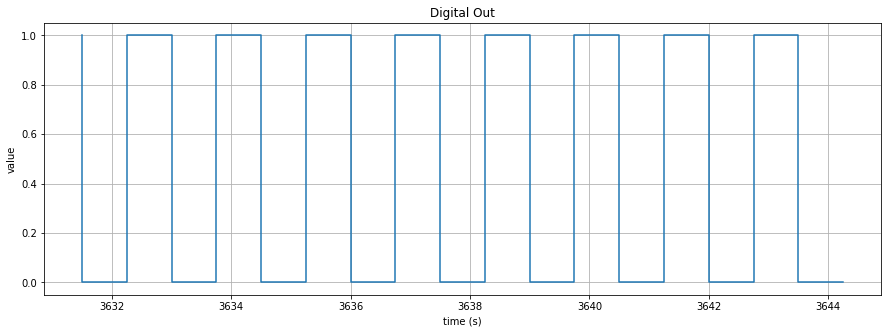

In [130]:
import matplotlib.pyplot as plt
import serial

# serial port parameters
PORT = '/dev/ttyACM0'
BAUDRATE = 9600

t_list = []
atomic_id_list = []
atomic_name_list = []
port_name_list = []
val_list = []

with serial.Serial(PORT, BAUDRATE, timeout=1) as ser:
    for i in range(0,200):
        line = ser.readline()
        # debug
        # print(line)
        if len(line.decode("utf-8").split(";")) != 5:
            continue
        t,atomic_id,atomic_name,port_name,val = line.decode("utf-8").split(";")
        if (atomic_name=="digitalOuput"):
            print(line)
            t_list.append(float(t))
            val_list.append(float(val.split(" ")[-1]))

plt.figure(figsize=(15,5))
plt.step(t_list[1:],val_list[1:]) # discard first element
plt.title('Digital Out')
plt.xlabel('time (s)')
plt.ylabel('value')
plt.grid(True)

<a id='example-seven-segments'></a>
# Example 2: Seven Segments LEDs

# Alternatives to C++ StreamStrings for logging

In spite of the aforementioned, we still have to debug our embedded simulations to get an insight of what is going on inside the simulation. So getting rid of the logging would not be an option. 

To this end, we could take advantage of the `minimal-printf` that comes with the libraries of `Mbed-OS`. This is enabled in the configuration file `mbed_app.json` adding the line:

```
"target.printf_lib": "minimal-printf"
```

In [119]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1
cat mbed_app.json

{
    "macros": [
        "NDEBUG=1"
    ],
    "target_overrides": {
        "*": {
            "target.printf_lib": "minimal-printf",
            "platform.memory-tracing-enabled": "true",
            "platform.stdio-baud-rate": 9600
        },
        "K64F": {
            "platform.stdio-baud-rate": 9600
        }
    }
}


This way, instead of overriding the insertion operator `<<` in the deinition of \<MyAtomic\> class we should make an string with all the state values for the atomic. This string should be part of the Atomic Class that the \<MyAtomic\> inherits from.

I was working on this but with no success :-(

# Built-in atomic models in Cadmium v2

Cadmium comes with some built-in atomic models to interact with the hardware for:
* Digital Inputs
* Digital Outputs
* Analog Inputs
* Analog Outputs
* PWM Outputs
* Interrupt Inputs

These can be found under `cadmium/core/real_time/arm_mbed/io/`:

In [69]:
%%bash -s "$CADMIUMV2_SRC"

cd $1/real_time/arm_mbed/io
ls

analogInput.hpp
analogOutput.hpp
digitalInput.hpp
digitalOutput.hpp
interruptInput.hpp
pwmOutput.hpp


These atomic models make use of the APIs provided by `Mbed-OS` that can be checked [here]().

So, let's take a look to the atomic model for the digital input:

In [70]:
%%bash -s "$CADMIUMV2_SRC"

cd $1/real_time/arm_mbed/io
cat digitalInput.hpp

/**
* Jon Menard
* ARSLab - Carleton University
*
* Digital Input:
* Model to interface with a digital Input pin for Embedded Cadmium.
*/

#ifndef RT_DIGITALINPUT_TEST_HPP
#define RT_DIGITALINPUT_TEST_HPP

#ifndef NO_LOGGING
	#include <iostream>
#endif
#include <optional>
#include <cadmium/core/modeling/atomic.hpp>

#include <limits>
#include <math.h> 
#include <assert.h>
#include <memory>
#ifndef NO_LOGGING
	#include <iomanip>
	#include <iostream>
	#include <fstream>
#endif
#include <string>
#include <chrono>
#include <algorithm>
#include <limits>
#include <random>

#ifdef RT_ARM_MBED
#endif

#include "../mbed.h"
using namespace std;

namespace cadmium {
  
  struct DigitalInputState {
      bool output;
      bool last;
      double sigma;

      /**
      * Processor state constructor. By default, the processor is idling.
      * 
      */
      explicit DigitalInputState(): output(true), last(false), sigma(0){
      }

  }; 

#ifndef NO_LOGGING
  /**
     * Insertion operator for P

Where `DigitalIn` is a class provided by Mbed-OS. The corresponding documentation can be checked [here](https://os.mbed.com/docs/mbed-os/v6.15/apis/digitalin.html).

In case we want to add drivers to Mbed-OS, it is done by creating a folder `drivers/` in the root folder for our model and the put there the code for the driver.

A lot of drivers for Mbed-OS can be found easily by _googling_.

# Extras

# Drivers for Mbed-OS

Drivers in mbed-os are located in the folder `mbed-os/drivers/`. There we can find: `AnalogIn`, `AnalogOut`, `DigitalIn`, `DigitalOut`, `PwmOut`, `I2C`, etc. Thiee drivers are used for instance for the atomics: [analogInput](https://github.com/SimulationEverywhere/cadmium_v2/blob/dev-rt/include/cadmium/core/real_time/arm_mbed/io/analogInput.hpp), [analogOutput](https://github.com/SimulationEverywhere/cadmium_v2/blob/dev-rt/include/cadmium/core/real_time/arm_mbed/io/analogOutput.hpp), [digitalInput](https://github.com/SimulationEverywhere/cadmium_v2/blob/dev-rt/include/cadmium/core/real_time/arm_mbed/io/digitalInput.hpp), [digitalOutput](https://github.com/SimulationEverywhere/cadmium_v2/blob/dev-rt/include/cadmium/core/real_time/arm_mbed/io/digitalOutput.hpp), [pwmOutput](https://github.com/SimulationEverywhere/cadmium_v2/blob/dev-rt/include/cadmium/core/real_time/arm_mbed/io/pwmOutput.hpp) in cadmium_v2 (`cadmium_v2/include/cadmium/core/real_time/arm_mbed/io/`). In addition, the sensor drivers developed for mbed-os make use of these drivers, for instance the driver for [sht31](https://os.mbed.com/users/andcor02/code/Sht31//file/c84a60326ecf/Sht31.h/) that depends on the mbed-os driver for [I2C](https://github.com/ARMmbed/mbed-os/blob/master/drivers/include/drivers/I2C.h).

Drivers APIs includes analog and digital inputs and outputs on development boards, as well as digital interfaces, which allow your board to interface with a computer or external devices, for instance: `AnalogIn`, `AnalogOut`, `DigitalIn`, `DigitalOut`, `PwmOut`, `I2C`. [Documentation](https://os.mbed.com/docs/mbed-os/v5.15/apis/drivers.html) for Drivers APIs.

The [Timer](https://github.com/SimulationEverywhere/cadmium_v2/blob/215d200666490af67372758eedaf7149c98ce53b/include/cadmium/core/real_time/rt_clock.hpp#L86) used for advancing the time in an embedded simulation is a [Driver](https://github.com/ARMmbed/mbed-os/blob/master/drivers/include/drivers/Timer.h) too.

Network Interfaces API. Documentation for [Network Interfaces](https://os.mbed.com/docs/mbed-os/v5.15/apis/network-interfaces.html) APIs. Among them, the WiFi API can be found [here](https://os.mbed.com/docs/mbed-os/v5.15/apis/wi-fi.html) along with an example of use.

Check the mbed-os version in `mbed_version.h` file under the `mbed-os/platform/` folder. The mbed-os 5 version will not be longer updated and its last update can be found [here](https://os.mbed.com/mbed-os/releases/#).

The resulting file to be downloaded in the board lies in the `BUILD/` folder. There you will also find the compiled drivers.

Under this folder, you will find a subfolder with the name of the **board**, for instance `NUCLEO_F401RE`, and the string `GCC_ARM` followed by the name of the profile, for instance for `cadmium.json` we have `GCC_ARM-CADMIUM`. So the path for the executable is: `/BUILD/NUCLEO_F401RE/GCC_ARM-CADMIUM`.

Under this folder you will find all the compiled `.o` files.

## Additional resources

* Driver for temperature sensor SHT31: [link](https://os.mbed.com/users/andcor02/code/Sht31/)

* Driver for compass HMC5883L: [lnk](https://os.mbed.com/users/xeta05/code/HMC5883L/)
* Datasheet for compas HMC5883L: [link](https://cdn-shop.adafruit.com/datasheets/HMC5883L_3-Axis_Digital_Compass_IC.pdf)

* Built-in drivers with mbed-os: [link](https://os.mbed.com/docs/mbed-os/v6.15/apis/drivers.html)

# Mbed-OS and the Arduino Bluepill board

We can use Mbed-OS with the Arduino Bluepill board. To program this board we can use the ST-Link board that comes with the NUCLEO-F103RB or NUCLEO-F401RE boards. In order to do this follows the steps [here](https://os.mbed.com/users/hudakz/code/STM32F103C8T6_Hello/).

Have in mind that even when the Arduino Bluepill is advertized as having 128kB of Flash memory, in general it is provided with 128kB. Therefore, the Blinky LED example with Cadmium v2 that occupies ~70kB runs perfectly. The onboard LED is wired to port PC_13 and for the switch I used PB_13.

**NOTE** To program the bluepill with the ST-Link in a NUCLEO board, you will have to copy the executable in the USB device created after connecting the NUCLEO board. If it says that there is no much space, then remove and reconect the NUCLEO board from the USB and try again. 